# DAY_09

***

<br>

### 01. 정형 데이터 마이닝<br>
#### Q1) 연관규칙분석을 수행하기 위해 lotto 데이터셋을 transaction 데이터로 변환하시오. 
#### 단, 본 분석에서 로또번호가 추첨된 순서는 고려하지 않고 분석을 수행하도록 한다. 
#### 그리고 변환된 데이터에서 가장 많이 등장한 
#### 상위 10개의 로또번호를 막대그래프로 출력하고 이에 대해 설명하시오.  

In [157]:
import pandas as pd
import numpy as np
from apyori import apriori
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from collections import Counter

In [12]:
df = pd.read_csv("C:/Users/kcisa/Desktop/ADP실기/모의고사 1회/lotto.csv")

In [87]:
df.head()

,time_id,num1,num2,num3,num4,num5,num6
0,859,8,22,35,38,39,41
1,858,9,13,32,38,39,43
2,857,6,10,16,28,34,38
3,856,10,24,40,41,43,44
4,855,8,15,17,19,43,44


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 859 entries, 0 to 858
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   time_id  859 non-null    int64
 1   num1     859 non-null    int64
 2   num2     859 non-null    int64
 3   num3     859 non-null    int64
 4   num4     859 non-null    int64
 5   num5     859 non-null    int64
 6   num6     859 non-null    int64
dtypes: int64(7)
memory usage: 47.1 KB


In [17]:
num_list = pd.concat([df.num1, df.num2, df.num3, df.num4, df.num5, df.num6], axis = 0, ignore_index = True)

In [47]:
num_cnt_df = pd.DataFrame(Counter(num_list).items(), columns = ['number', 'count'])
top10_df = num_cnt_df.sort_values(by = 'count', ascending = 0)[:10]

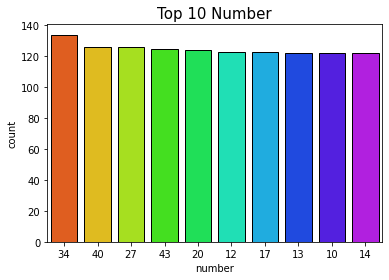

In [54]:
sns.barplot(top10_df.number, top10_df['count'], order = top10_df.number, palette = 'gist_rainbow', edgecolor = (0,0,0))
plt.title('Top 10 Number', size = 15)
plt.show()

Top 10개의 숫자들을 추출하여 시각화 한 결과 34번이 가장 많이 등장했고 나머지 숫자들의 빈도는 비슷하였다.

In [55]:
value_list = []
for row in range(df.shape[0]) :
    value_list.append(df.iloc[row, 1:].values)

In [59]:
df['value_list'] = value_list
df = df[['time_id', 'value_list']]

In [62]:
df[::-1].head()

,time_id,value_list
858,1,"[10, 23, 29, 33, 37, 40]"
857,2,"[9, 13, 21, 25, 32, 42]"
856,3,"[11, 16, 19, 21, 27, 31]"
855,4,"[14, 27, 30, 31, 40, 42]"
854,5,"[16, 24, 29, 40, 41, 42]"


#### Q2) 변환한 데이터에 대해 apriori함수를 사용하여 다음 괄호 안의 조건을 반영하여 
#### 연관규칙을 생성하고, 이를 ‘rules_1’이라는 변수에 저장하여 결과를 해석하시오. 
#### (최소 지지도 : 0.002, 최소 신뢰도 : 0.8, 최소조합 항목 수 : 2개, 최대조합 항목 수 : 6개) 
#### 그리고 도출된 연관규칙들을 향상도를 기준으로 내림차순 정렬하여 상위 30개의 규칙을 확인하고, 
#### 이를 데이터프레임으로 변환하여 csv파일로 출력하시오.  

In [164]:
association_rules = apriori(df.value_list, min_support = 0.002, min_confidence = 0.8, max_length = 6,  min_length=2)
association_result = list(association_rules)

In [165]:
rules_1 = pd.DataFrame(association_result)

In [166]:
print(f'연관분석에서 생성된 규칙의 개수는 {rules_1.shape[0]}개이다.')

연관분석에서 생성된 규칙의 개수는 394개이다.


In [167]:
rules_1['lhs'] = [x[0][0] for x in rules_1.ordered_statistics] # 좌측항 생성

In [168]:
rules_1['rhs'] = [x[0][1] for x in rules_1.ordered_statistics] # 우측항 생성

In [169]:
rules_1['confindence'] = [x[0][2] for x in rules_1.ordered_statistics] # 신뢰도 생성

In [170]:
rules_1['lift'] = [x[0][3] for x in rules_1.ordered_statistics] # 향상도 생성

In [171]:
rules_1['n_items'] = rules_1['items'].apply(lambda x : len(x))

#### Q3) 생성된 연관규칙 'rules_1'에 대한 정보를 해석하고, 1)번 문제를 통해 확인했을 때 
#### 가장 많이 추첨된 번호가 우측항에 존재하는 규칙들만을 ‘rules_most_freq’라는 변수에 저장하시오. 
#### 그리고 해당 규칙들을 해석하여 인사이트를 도출한 후 서술하시오.

In [172]:
vc = rules_1.n_items.value_counts()
for n in range(rules_1.n_items.nunique()) :
    print(f'{vc.index[n]}개의 번호로 구성된 규칙은 {vc.values[n]}개이다.')

4개의 번호로 구성된 규칙은 384개이다.
5개의 번호로 구성된 규칙은 10개이다.


In [173]:
print(f'규칙들에 대한 평균 지지도는 {np.round(rules_1.support.mean(), 6)}로 나타났다.')

규칙들에 대한 평균 지지도는 0.002361로 나타났다.


In [174]:
print(f'규칙들에 대한 평균 신뢰도는 {np.round(rules_1.lift.mean(), 6)}로 나타났다.')
print(f'규칙들에 대한 최소 신뢰도는 {np.round(rules_1.lift.min(), 6)}로 나타났다.')

규칙들에 대한 평균 신뢰도는 8.684778로 나타났다.
규칙들에 대한 최소 신뢰도는 6.410448로 나타났다.


In [175]:
rules_1['in_34'] = [1 if 34 in x else 0 for x in rules_1['items']] # 34번이 가장 많이 등장

In [177]:
rules_1.drop(['ordered_statistics', 'items'], axis = 1, inplace = True) # 불필요한 열 삭제

In [184]:
rules_most_freq = rules_1.loc[rule_df.in_34 == 1] # 34가 등장한 행만 추출
rules_most_freq.head()

,support,lhs,rhs,confindence,lift,n_items,in_34
5,0.002328,"(1, 13, 5)",(34),1.0,6.410448,4,1
32,0.003492,"(2, 4, 31)",(34),1.0,6.410448,4,1
42,0.002328,"(2, 21, 15)",(34),1.0,6.410448,4,1
44,0.002328,"(2, 28, 15)",(34),1.0,6.410448,4,1
119,0.002328,"(13, 29, 5)",(34),1.0,6.410448,4,1


In [183]:
print(f'총 {rules_most_freq.shape[0]}개의 규칙이 도출되었다.')

총 18개의 규칙이 도출되었다.


첫번째 규칙을 살펴보면 {1, 13, 5}번과 {34}번이 함께 뽑힐 확률은 지지도(support)를 봤을 때 0.002328로 약 0.2%에 불과하다. 해당 규칙의 향상도(lift)는 6.410448로 {34}만 뽑힐 때 보다 {1, 13, 5}가 뽑히고 {34}도 뽑힐 확률이 6배 가량 높다는 것을 의미한다. 하지만 단순히 확률만 고려한 규칙이기 때문에 해당 조합들이 당첨 확률을 보장해준다고는 할 수 없다.